<a href="https://colab.research.google.com/github/asadali163/Computer-Vision-Projects/blob/main/codebase/CV_image_compression_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten, UpSampling2D, Reshape
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.utils import to_categorical

In [2]:
# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

As you can see it has 60000 train images and 10000 test images

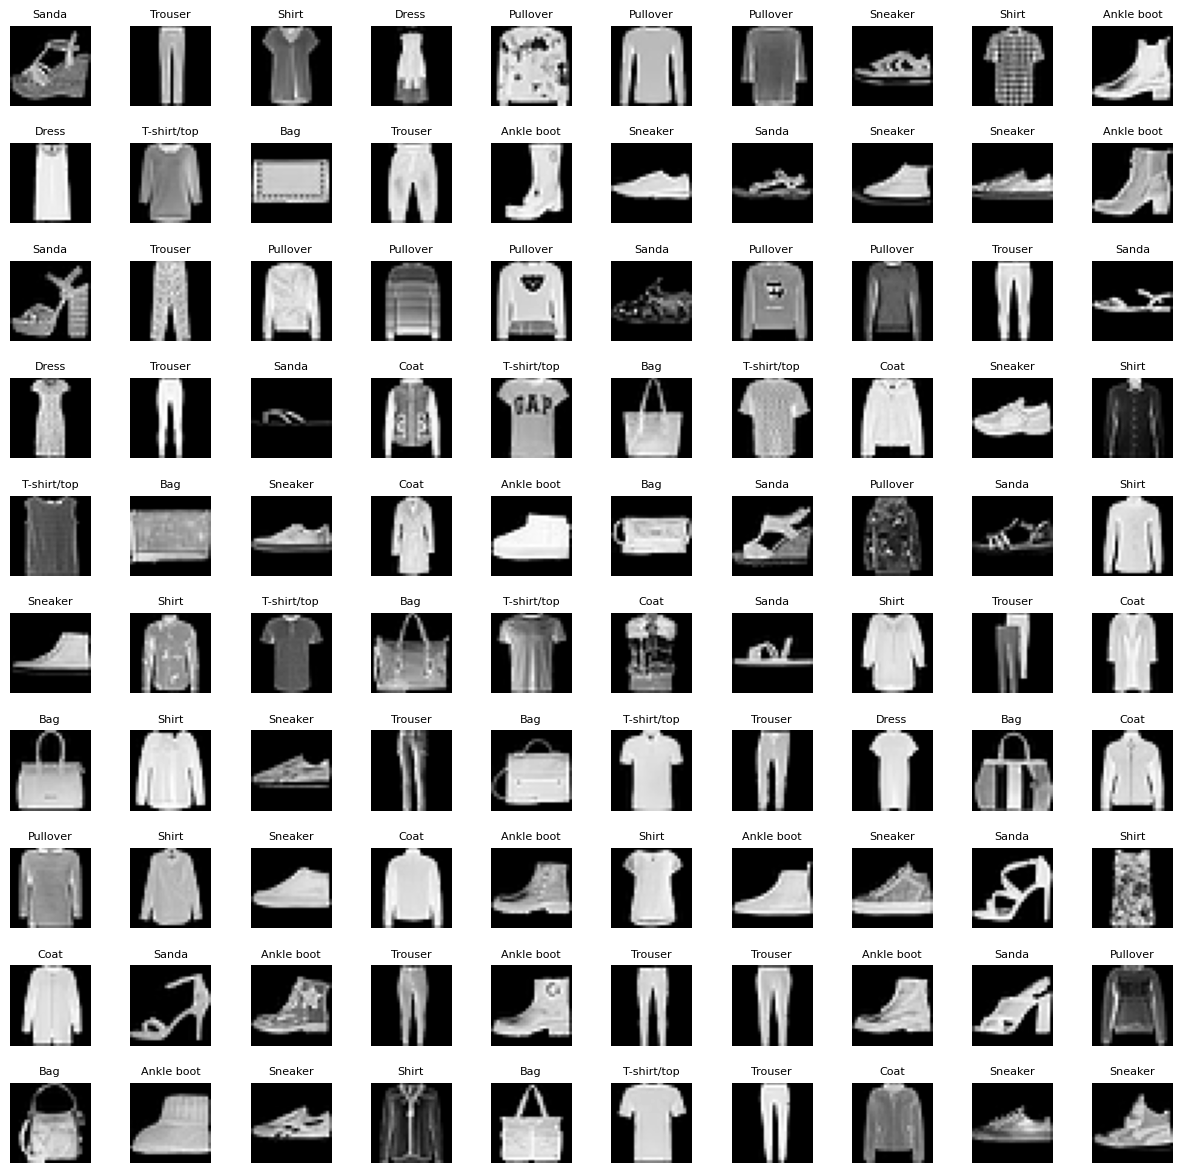

In [5]:
from types import FunctionType
# Let's plot some of the images
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sanda', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(width, height, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, width*height):
  index = np.random.randint(0, 60000)
  axes[i].imshow(X_train[index], cmap='gray')
  axes[i].set_title(classes[y_train[index]], fontsize=8)
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)

Let's do some data pre-processing

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

As we are working with CNN, so we don't need to flatten the images, instead it should be in format of (total_images, height, width, channels)

In [8]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [9]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Let's create the autoencoder model

In [29]:
from enum import auto
autoencoder = Sequential()

# Encoder
autoencoder.add(Input(shape=(28, 28, 1)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPool2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPool2D((2, 2), padding='same'))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=(2,2)))
autoencoder.add(Flatten())

# Decoder
autoencoder.add(Reshape((4, 4, 8)))
autoencoder.add(Conv2D(8, (3,3), padding='same', activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3,3), padding='same', activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3,3), padding='valid', activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3,3), padding='same', activation='sigmoid'))
autoencoder.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_16 (Reshape)                 │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_19 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_20 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_21 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [31]:
autoencoder.fit(X_train, X_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 38ms/step - loss: 0.3563
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - loss: 0.2908
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - loss: 0.2851
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - loss: 0.2824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - loss: 0.2792
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - loss: 0.2768
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 40ms/step - loss: 0.2768
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 88s 43ms/step - loss: 0.2756
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 45ms/step - loss: 0.2747
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 131s 39ms/step - loss: 0.2744


Now first we will select the encoded part. It will be from input layer to the flatten layer
- We don't have the decoded part because when we predict, the image will be decoded to its original size. So we don't need to do extra something here

In [32]:
autoencoder.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_78 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_16 (Reshape)                 │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_81 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_19 (UpSampling2D)      │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_82 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_20 (UpSampling2D)      │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_83 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_21 (UpSampling2D)      │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_84 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,157 (51.40 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,772 (34.27 KB)

In [36]:
encoder = Model(inputs=autoencoder.inputs, outputs=autoencoder.get_layer('flatten_18').output)
encoder.summary()

Model: "functional_189"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_78 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_79 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_80 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 128)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,904 (7.44 KB)

 Trainable params: 1,904 (7.44 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
X_encoded = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [38]:
X_decoded = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


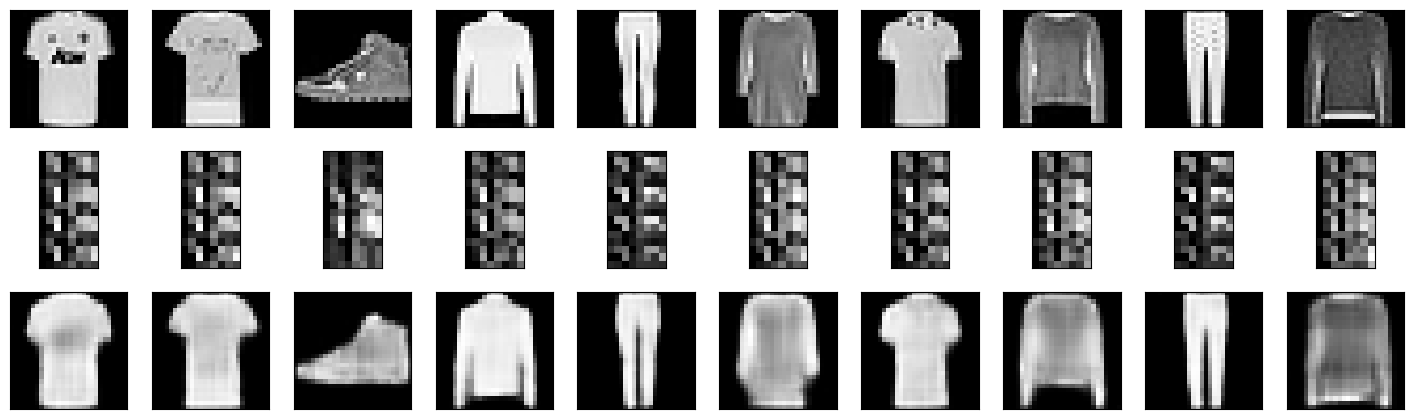

In [40]:
# Let's plot some of the test examples
n_images = 10
test_images = np.random.randint(0, 10000, n_images)
plt.figure(figsize=(18, 18))

for i, image_index in enumerate(test_images):
  ax = plt.subplot(10, 10, i+1)
  plt.imshow(X_test[image_index].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Encoded images
  ax = plt.subplot(10, 10, i+1+n_images)
  plt.imshow(X_encoded[image_index].reshape(16, 8), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # Decoded images
  ax = plt.subplot(10, 10, i+1+2*n_images)
  plt.imshow(X_decoded[image_index].reshape(28, 28), cmap='gray')
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

As you can see these images are complex and we trained for few epochs. May be if we train for more epochs we can get better results. Still it has good results